# Data Preprocessing

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import scipy.stats
%matplotlib inline

In [61]:
df = pd.read_excel('Normal_Medical.xlsx')
df.head()

,GenderFM,GroupPictureGS,AgeCA,StatusPN,Position,AmountRaised,Goal,DonatorsNumber,Fundraising,FacebookShares,FacebookHearts,Updates,Target
0,M,S,A,P,0,123335.8171,190817.11710,1498.032220,111.513342,6365.583260,1503.672319,13.356,0
1,M,G,A,P,1,117779.3482,-55434.50806,1075.122208,67.562508,4676.032376,1030.572312,-2.64838,1
2,M,G,A,P,1,114353.5865,175548.49210,1336.925030,24.108652,6738.705205,1368.283147,10.8408,0
3,M,S,C,P,2,111833.4708,127985.50500,1224.248576,67.562508,5583.315614,1261.381609,4.71012,1
4,M,S,A,P,2,109822.5481,127985.50500,1757.671000,111.513342,5722.593346,1809.699292,6.91727,1


In [62]:
df.dropna(inplace=True)

In [63]:
le = LabelEncoder()
df['GenderFM'] = le.fit_transform(df['GenderFM'])
df['GroupPictureGS']= le.fit_transform(df['GroupPictureGS'])
df['AgeCA'] = le.fit_transform(df['AgeCA'])
df['StatusPN'] = le.fit_transform(df['StatusPN'])

In [65]:
df=df.reset_index()[df.columns]
df

,GenderFM,GroupPictureGS,AgeCA,StatusPN,Position,AmountRaised,Goal,DonatorsNumber,Fundraising,FacebookShares,FacebookHearts,Updates,Target
0,2,1,0,2,0,123335.81710,190817.117100,1498.032220,111.513342,6365.583260,1503.672319,13.356,0
1,2,0,0,2,1,117779.34820,-55434.508060,1075.122208,67.562508,4676.032376,1030.572312,-2.64838,1
2,2,0,0,2,1,114353.58650,175548.492100,1336.925030,24.108652,6738.705205,1368.283147,10.8408,0
3,2,1,1,2,2,111833.47080,127985.505000,1224.248576,67.562508,5583.315614,1261.381609,4.71012,1
4,2,1,0,2,2,109822.54810,127985.505000,1757.671000,111.513342,5722.593346,1809.699292,6.91727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2,0,0,2,330,-15729.84307,-6532.265312,349.137569,144.870882,3403.337415,369.439544,-2.64838,1
723,2,0,0,2,331,-17740.76576,27788.292440,390.324319,19.808270,3403.337415,441.294764,4.71012,0
724,0,0,0,2,331,-20260.88142,-6532.265312,-81.849987,111.513342,1955.839024,-53.368741,2.10805,1
725,0,1,1,2,332,-23686.64311,-6532.265312,-168.895377,67.562508,1322.030572,-165.297344,9.96822,1


In [66]:
df1 = df.iloc[:,5:]
df1 = df1.drop(['AmountRaised','Target'],axis =1)
df1.head()

,Goal,DonatorsNumber,Fundraising,FacebookShares,FacebookHearts,Updates
0,190817.11710,1498.032220,111.513342,6365.583260,1503.672319,13.356
1,-55434.50806,1075.122208,67.562508,4676.032376,1030.572312,-2.64838
2,175548.49210,1336.925030,24.108652,6738.705205,1368.283147,10.8408
3,127985.50500,1224.248576,67.562508,5583.315614,1261.381609,4.71012
4,127985.50500,1757.671000,111.513342,5722.593346,1809.699292,6.91727


In [67]:
df1_train = df1.iloc[0:583]
df1_test = df1.iloc[583:]

In [68]:
df2 = df.iloc[:,0:5]
df2.head()

,GenderFM,GroupPictureGS,AgeCA,StatusPN,Position
0,2,1,0,2,0
1,2,0,0,2,1
2,2,0,0,2,1
3,2,1,1,2,2
4,2,1,0,2,2


In [69]:
df2_train = df2.iloc[0:583]
df2_test = df2.iloc[583:]

In [70]:
df3 = df.drop(['AmountRaised','Target'],axis =1)

df3['GenderFM']=le.fit_transform(df3['GenderFM'])
df3['GroupPictureGS']=le.fit_transform(df3['GroupPictureGS'])
df3['AgeCA']=le.fit_transform(df3['AgeCA'])
df3['StatusPN']=le.fit_transform(df3['StatusPN'])

In [71]:
List1 =df3.iloc[:,:5]
List2 = df3.iloc[:,5:]

for i in List1:
  for j in List2:
    df3[i+j]=df3.apply(lambda x:x[i]*x[j],axis =1)

In [72]:
df3.head()

,GenderFM,GroupPictureGS,AgeCA,StatusPN,Position,Goal,DonatorsNumber,Fundraising,FacebookShares,FacebookHearts,...,StatusPNFundraising,StatusPNFacebookShares,StatusPNFacebookHearts,StatusPNUpdates,PositionGoal,PositionDonatorsNumber,PositionFundraising,PositionFacebookShares,PositionFacebookHearts,PositionUpdates
0,2,1,0,2,0,190817.11710,1498.032220,111.513342,6365.583260,1503.672319,...,223.026685,12731.166520,3007.344638,26.7119,0.00000,0.000000,0.000000,0.000000,0.000000,0
1,2,0,0,2,1,-55434.50806,1075.122208,67.562508,4676.032376,1030.572312,...,135.125017,9352.064752,2061.144624,-5.29677,-55434.50806,1075.122208,67.562508,4676.032376,1030.572312,-2.64838
2,2,0,0,2,1,175548.49210,1336.925030,24.108652,6738.705205,1368.283147,...,48.217305,13477.410410,2736.566294,21.6817,175548.49210,1336.925030,24.108652,6738.705205,1368.283147,10.8408
3,2,1,1,2,2,127985.50500,1224.248576,67.562508,5583.315614,1261.381609,...,135.125017,11166.631228,2522.763218,9.42025,255971.01000,2448.497152,135.125017,11166.631228,2522.763218,9.42025
4,2,1,0,2,2,127985.50500,1757.671000,111.513342,5722.593346,1809.699292,...,223.026685,11445.186692,3619.398584,13.8345,255971.01000,3515.342000,223.026685,11445.186692,3619.398584,13.8345


In [73]:
df3_train = df3.iloc[0:583]
df3_test = df3.iloc[583:]

# Data Description

In [81]:
mc_data = pd.read_excel('Mc_data.xlsx')

In [82]:
def normalize_date(x):
    if 'months' in x:
        x = float(x.replace('months',''))*30
    elif 'month' in x:
        x = float(x.replace('month',''))*30
    else:
        x = float(x.replace('days',''))
    return(x)
mc_data['Length_of_Fundraising']=mc_data['Length_of_Fundraising'].apply(normalize_date)

def normalize_number(x):
    if isinstance(x,str):
        if 'k' in x:
            x = float(x.replace('k',''))*1000
    else:
        x = float(x)
    return(x)
mc_data['Facebook_Shares']=mc_data['Facebook_Shares'].apply(normalize_number)
mc_data['Favorite_Hearts']=mc_data['Favorite_Hearts'].apply(normalize_number)

In [83]:
mc_data['Facebook_Shares']=mc_data['Facebook_Shares'].apply(pd.to_numeric)
mc_data['Favorite_Hearts']=mc_data['Favorite_Hearts'].apply(pd.to_numeric)

In [84]:
mc_data.dropna(inplace=True)

In [85]:
# Describe Dataset
mc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Position,729.0,162.456790,95.692078,0.0,80.0,160.0,245.0,332.0
Amount_Raised,729.0,47046.352538,25471.363805,26279.0,30943.0,38652.0,53535.0,241461.0
Goal,729.0,71625.310014,63461.360006,1.0,35000.0,50000.0,100000.0,500000.0
Donators_Number,729.0,454.152263,435.216057,41.0,239.0,340.0,502.0,4483.0
Length_of_Fundraising,729.0,88.695473,46.021262,4.0,60.0,90.0,120.0,180.0
Facebook_Shares,729.0,1711.710562,2146.875793,22.0,634.0,1100.0,2000.0,23000.0
Favorite_Hearts,729.0,460.659808,450.414427,38.0,238.0,339.0,513.0,4700.0
Updates,729.0,5.330590,6.931110,1.0,2.0,3.0,6.0,73.0


In [87]:
le = LabelEncoder()
mc_data['GenderFM'] = le.fit_transform(mc_data['GenderFM'])
mc_data['GroupPictureGS']= le.fit_transform(mc_data['GroupPictureGS'])
mc_data['AgeCA'] = le.fit_transform(mc_data['AgeCA'])
mc_data['StatusPN'] = le.fit_transform(mc_data['StatusPN'])

In [93]:
mc_data

,GenderFM,GroupPictureGS,AgeCA,StatusPN,Position,Amount_Raised,Goal,Donators_Number,Length_of_Fundraising,Facebook_Shares,Favorite_Hearts,Updates
1,2,1,0,2,0,241461,100000,4483,30.0,21000.0,4700.0,2.0
2,2,1,0,2,0,225090,250000,2464,120.0,8900.0,2500.0,10.0
3,2,0,0,2,1,197512,10000,900,60.0,3700.0,776.0,1.0
4,2,0,0,2,1,194235,200000,1936,27.0,12000.0,2000.0,7.0
7,2,1,1,2,2,150630,100000,1300,60.0,6100.0,1300.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
988,2,0,0,2,330,26365,25000,297,150.0,2200.0,306.0,1.0
990,2,0,0,2,331,26357,35000,316,25.0,2200.0,334.0,3.0
992,0,0,0,2,331,26350,25000,181,120.0,1200.0,186.0,2.0
994,0,1,1,2,332,26287,25000,163,60.0,983.0,165.0,6.0


In [92]:
import scipy.stats as stats

In [94]:
lable = ['GenderFM', 'GroupPictureGS', 'AgeCA', 'StatusPN', 'Position', 'Amount_Raised', 'Goal', 'Donators_Number', 'Length_of_Fundraising', 'Facebook_Shares', 'Favorite_Hearts', 'Updates']

In [100]:
for l in range(len(lable)):
    for n in range(len(lable)):
        try:
            corrP = stats.pearsonr(mc_data[lable[l]],mc_data[lable[l+n]])
            print(lable[l], lable[l+n], corrP)
        except:
            pass

GenderFM GenderFM (0.9999999999999984, 0.0)
GenderFM GroupPictureGS (-0.06711116520703048, 0.07015106914373972)
GenderFM AgeCA (-0.05914223242160348, 0.11060118139681836)
GenderFM StatusPN (0.013324635393248019, 0.7194726067655284)
GenderFM Position (-0.06531024163272389, 0.07803006685181886)
GenderFM Amount_Raised (0.0588705673047963, 0.11225123480305862)
GenderFM Goal (0.03704599857045965, 0.31785844390050083)
GenderFM Donators_Number (-0.008397644181529332, 0.8209282041564991)
GenderFM Length_of_Fundraising (0.014376385722605047, 0.6983739891091966)
GenderFM Facebook_Shares (0.015898937782667592, 0.6682421760573038)
GenderFM Favorite_Hearts (-0.006040990517747843, 0.870653599209078)
GenderFM Updates (0.03316977016082409, 0.3711651261400536)
GroupPictureGS GroupPictureGS (0.9999999999999996, 0.0)
GroupPictureGS AgeCA (0.20917517081979436, 1.1895061226040269e-08)
GroupPictureGS StatusPN (-0.16301959594920826, 9.706960315698647e-06)
GroupPictureGS Position (-0.0787807211631717, 0.03344

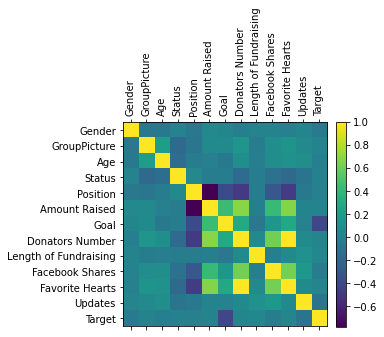

In [19]:
# Correlation Plot
corrPlot = plt.matshow(corr)
groups = ['Gender', 'GroupPicture', 'Age', 'Status', 'Position', 'Amount Raised', 'Goal', 'Donators Number', 'Length of Fundraising', 'Facebook Shares', 'Favorite Hearts', 'Updates', 'Target']
x_pos = np.arange(len(groups))
plt.xticks(x_pos, groups, rotation='vertical')
y_pos = np.arange(len(groups))
plt.yticks(y_pos, groups)

collorBar = plt.colorbar(corrPlot, fraction=0.046, pad=0.04) 
plt.show()

# Classification

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## K Nearest Neighbor(KNN)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Model 1

In [22]:
# Split the X into train and test to find the best k
X_train, X_test, y_train, y_test = train_test_split(df1_train, df['Target'][0:583], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (466, 6) (466,)
Test set: (117, 6) (117,)


In [23]:
# Modeling
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [24]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.74358974, 0.76923077, 0.74358974, 0.81196581, 0.79487179,
       0.8034188 , 0.8034188 , 0.81196581, 0.8034188 , 0.81196581,
       0.82051282, 0.8034188 , 0.8034188 , 0.81196581])

In [25]:
# Building the model again, using k=4
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=4)

In [26]:
knn_yhat = kNN_model.predict(df1_test)
print("KNN F1-score: %.2f" % f1_score(df['Target'][583:], knn_yhat, average='weighted') )

KNN F1-score: 0.81


### Model 2

In [27]:
# Split the X into train and test to find the best k
X_train, X_test, y_train, y_test = train_test_split(df2_train, df['Target'][0:583], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (466, 5) (466,)
Test set: (117, 5) (117,)


In [28]:
# Modeling
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [29]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.63247863, 0.7008547 , 0.64957265, 0.68376068, 0.60683761,
       0.65811966, 0.60683761, 0.64102564, 0.63247863, 0.69230769,
       0.64102564, 0.67521368, 0.65811966, 0.69230769])

In [30]:
# Building the model again, using k=2
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=2)

In [31]:
knn_yhat = kNN_model.predict(df2_test)
print("KNN F1-score: %.2f" % f1_score(df['Target'][583:], knn_yhat, average='weighted') )

KNN F1-score: 0.16


### Model 3

In [32]:
# Split the X into train and test to find the best k
X_train, X_test, y_train, y_test = train_test_split(df3_train, df['Target'][0:583], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (466, 41) (466,)
Test set: (117, 41) (117,)


In [33]:
# Modeling
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [34]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.85470085, 0.8974359 , 0.86324786, 0.87179487, 0.82905983,
       0.83760684, 0.82051282, 0.8034188 , 0.81196581, 0.82051282,
       0.82051282, 0.82051282, 0.82051282, 0.83760684])

In [35]:
# Building the model again, using k=2
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=2)

In [36]:
knn_yhat = kNN_model.predict(df3_test)
print("KNN F1-score: %.2f" % f1_score(df['Target'][583:], knn_yhat, average='weighted') )

KNN F1-score: 0.75


## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

### Model 1

In [38]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(df1_train, df['Target'][0:583])
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
yhat = DT_model.predict(df1_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.8542024013722127

In [40]:
DT_yhat = DT_model.predict(df1_test)
print("DT F1-score: %.2f" % f1_score(df['Target'][583:], DT_yhat, average='weighted') )

DT F1-score: 0.85


### Model 2

In [41]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(df2_train, df['Target'][0:583])
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
yhat = DT_model.predict(df2_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.6981132075471698

In [43]:
DT_yhat = DT_model.predict(df2_test)
print("DT F1-score: %.2f" % f1_score(df['Target'][583:], DT_yhat, average='weighted') )

DT F1-score: 0.37


### Model 3

In [44]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(df3_train, df['Target'][0:583])
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [45]:
yhat = DT_model.predict(df3_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.9279588336192109

In [46]:
DT_yhat = DT_model.predict(df3_test)
print("DT F1-score: %.2f" % f1_score(df['Target'][583:], DT_yhat, average='weighted') )

DT F1-score: 0.86


## Support Vector Machine

In [47]:
from sklearn import svm

### Model 1

In [48]:
SVM_model = svm.SVC()
SVM_model.fit(df1_train, df['Target'][0:583]) 

SVC()

In [49]:
yhat = SVM_model.predict(df1_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.8284734133790738

In [50]:
SVM_yhat = SVM_model.predict(df1_test)
print("SVM F1-score: %.2f" % f1_score(df['Target'][583:], SVM_yhat, average='weighted') )

SVM F1-score: 0.81


### Model 2

In [51]:
SVM_model = svm.SVC()
SVM_model.fit(df2_train, df['Target'][0:583]) 

SVC()

In [52]:
yhat = SVM_model.predict(df2_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.6689536878216124

In [53]:
SVM_yhat = SVM_model.predict(df2_test)
print("SVM F1-score: %.2f" % f1_score(df['Target'][583:], SVM_yhat, average='weighted') )

SVM F1-score: 0.54


### Model 3

In [54]:
SVM_model = svm.SVC()
SVM_model.fit(df3_train, df['Target'][0:583]) 

SVC()

In [55]:
yhat = SVM_model.predict(df3_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.7530017152658662

In [56]:
SVM_yhat = SVM_model.predict(df3_test)
print("SVM F1-score: %.2f" % f1_score(df['Target'][583:], SVM_yhat, average='weighted') )

SVM F1-score: 0.69


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

### Model 1

In [58]:
LR_model = LogisticRegression(C=0.01).fit(df1_train, df['Target'][0:583])
LR_model

LogisticRegression(C=0.01)

In [59]:
yhat = LR_model.predict(df1_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.7890222984562607

In [60]:
LR_yhat = LR_model.predict(df1_test)
LR_yhat_prob = LR_model.predict_proba(df1_test)
print("LR F1-score: %.2f" % f1_score(df['Target'][583:], LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(df['Target'][583:], LR_yhat_prob))

LR F1-score: 0.80
LR LogLoss: 0.40


### Model 2

In [61]:
LR_model = LogisticRegression(C=0.01).fit(df2_train, df['Target'][0:583])
LR_model

LogisticRegression(C=0.01)

In [62]:
yhat = LR_model.predict(df2_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.6689536878216124

In [63]:
LR_yhat = LR_model.predict(df2_test)
LR_yhat_prob = LR_model.predict_proba(df2_test)
print("LR F1-score: %.2f" % f1_score(df['Target'][583:], LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(df['Target'][583:], LR_yhat_prob))

LR F1-score: 0.54
LR LogLoss: 0.63


### Model 3

In [64]:
LR_model = LogisticRegression(C=0.01).fit(df3_train, df['Target'][0:583])
LR_model

c:\users\shiran guo\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [65]:
yhat = LR_model.predict(df3_train)
mean_acc = np.mean(yhat==df['Target'][0:583])
mean_acc

0.7787307032590052

In [66]:
LR_yhat = LR_model.predict(df3_test)
LR_yhat_prob = LR_model.predict_proba(df3_test)
print("LR F1-score: %.2f" % f1_score(df['Target'][583:], LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(df['Target'][583:], LR_yhat_prob))

LR F1-score: 0.79
LR LogLoss: 0.39
